[View in Colaboratory](https://colab.research.google.com/github/arowshan/titanic-survival/blob/master/titanic_survival.ipynb)

In [0]:
import pandas as pd

In [0]:
train_data = pd.read_csv('./titanic-survival/train.csv')
test_data = pd.read_csv('./titanic-survival/test.csv')

In [246]:
train_data[0:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [247]:
test_data[0:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [0]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_data = train_data.dropna()
X_train_data = train_data.drop(['Survived'], axis=1)
y_train_data = train_data[['Survived']]
X = X_train_data
y = y_train_data
df = train_data

In [249]:
X_train_data[0:3]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S


In [0]:
import matplotlib.pyplot as plt

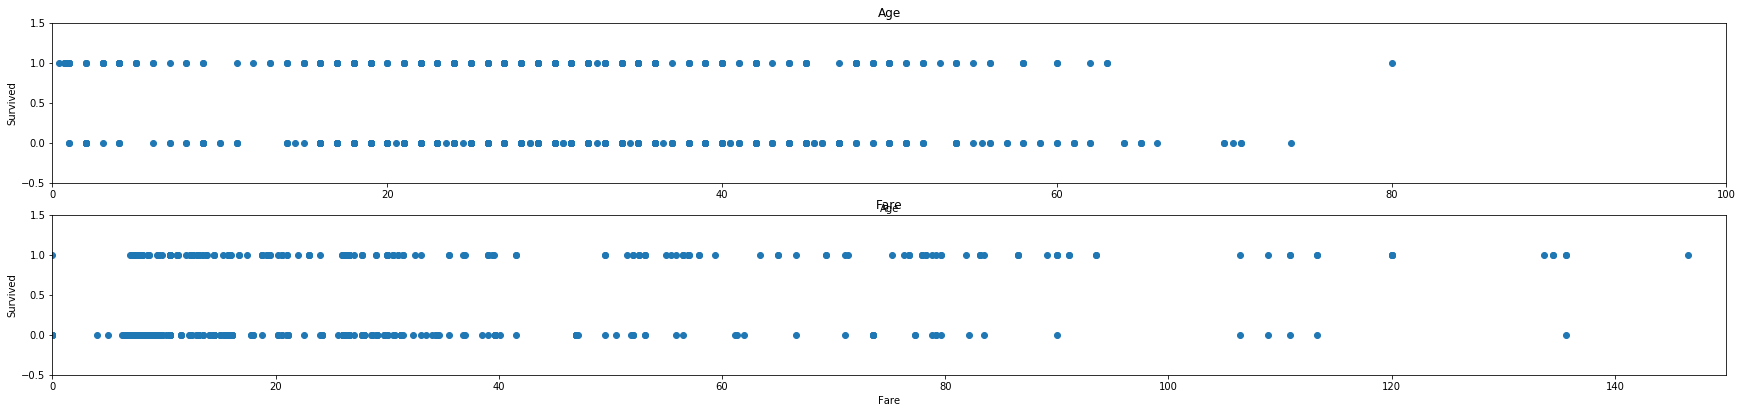

In [251]:
plt.figure(figsize=(30,10))
plt.subplot(311).set_title('Age')
plt.scatter(X['Age'], y['Survived'])
plt.ylabel('Survived')
plt.xlabel('Age')
plt.axis([0,100, -0.5,1.5])

plt.subplot(312).set_title('Fare')
plt.scatter(X['Fare'], y['Survived'])
plt.ylabel('Survived')
plt.xlabel('Fare')
plt.axis([0,150, -0.5,1.5])

plt.show()

In [0]:
yf = train_data[(train_data['Sex']=='female') & (train_data['Survived']==True) ].shape[0]
ym = train_data[(train_data['Sex']=='male') & (train_data['Survived']==True) ].shape[0]

yEs = train_data[(train_data['Embarked']=='S') & (train_data['Survived']==True) ].shape[0]
yEc = train_data[(train_data['Embarked']=='C') & (train_data['Survived']==True) ].shape[0]
yEq = train_data[(train_data['Embarked']=='Q') & (train_data['Survived']==True) ].shape[0]

yP1 = train_data[(train_data['Pclass']==1) & (train_data['Survived']==True) ].shape[0]
yP2 = train_data[(train_data['Pclass']==2) & (train_data['Survived']==True) ].shape[0]
yP3 = train_data[(train_data['Pclass']==3) & (train_data['Survived']==True) ].shape[0]

Sib0 = train_data[(train_data['SibSp']==0) & (train_data['Survived']==True) ].shape[0]
Sib1 = train_data[(train_data['SibSp']==1) & (train_data['Survived']==True) ].shape[0]
Sib2 = train_data[(train_data['SibSp']==2) & (train_data['Survived']==True) ].shape[0]
Sib3 = train_data[(train_data['SibSp']==3) & (train_data['Survived']==True) ].shape[0]
Sib4 = train_data[(train_data['SibSp']==4) & (train_data['Survived']==True) ].shape[0]
Sib5 = train_data[(train_data['SibSp']==5) & (train_data['Survived']==True) ].shape[0]
Sib8 = train_data[(train_data['SibSp']==8) & (train_data['Survived']==True) ].shape[0]

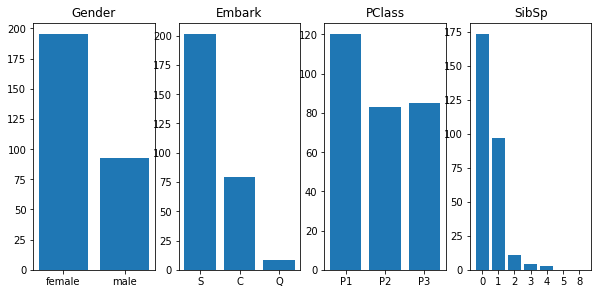

In [253]:
plt.figure(figsize=(10,10))

plt.subplot(241).set_title('Gender')
plt.bar(['female', 'male'], [yf, ym])

plt.subplot(242).set_title('Embark')
plt.bar(['S', 'C', 'Q'], [yEs, yEc, yEq])

plt.subplot(243).set_title('PClass')
plt.bar(['P1', 'P2', 'P3'], [yP1, yP2, yP3])

plt.subplot(244).set_title('SibSp')
plt.bar(['0', '1', '2', '3', '4', '5', '8'], [Sib0, Sib1, Sib2, Sib3, Sib4, Sib5, Sib8])

plt.show()

In [254]:
df[0:0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [0]:
X['Sex'] = pd.Categorical(X['Sex'])
X['Sex'] = X['Sex'].cat.codes

test_data['Sex'] = pd.Categorical(test_data['Sex'])
test_data['Sex'] = test_data['Sex'].cat.codes

In [0]:
X['Embarked'] = pd.Categorical(X['Embarked'])
X['Embarked'] = X['Embarked'].cat.codes

test_data['Embarked'] = pd.Categorical(test_data['Embarked'])
test_data['Embarked'] = test_data['Embarked'].cat.codes

In [0]:
from sklearn import preprocessing

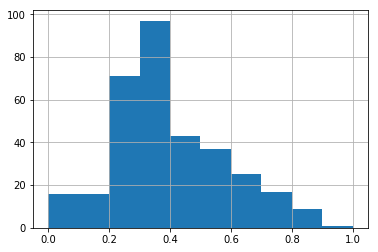

In [268]:
min_max_scaler = preprocessing.MinMaxScaler()
X['Age'] = min_max_scaler.fit_transform(X[['Age']])

test_mod = test_data.dropna()

test_data['Age'] = (test_data['Age'] - test_data['Age'].min()) / (test_data['Age'].max() - test_data['Age'].min())

test_data['Age'].hist()

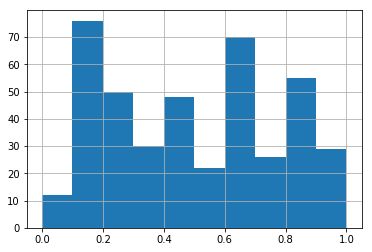

In [281]:
quantile_scaler = preprocessing.QuantileTransformer(n_quantiles=10, random_state=0)
X['Fare'] = quantile_scaler.fit_transform(X[['Fare']])
test_data['Fare'].fillna(0, inplace=True)
test_data[test_data['Fare'].isnull()]
test_data['Fare'] = quantile_scaler.fit_transform(test_data[['Fare']])
test_data['Fare'].hist()

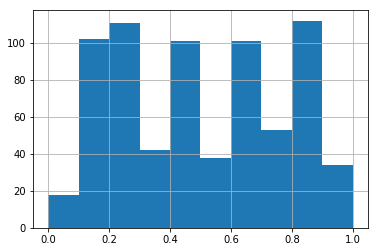

In [162]:
X['Fare'].hist()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [0]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=0.001)

In [197]:
model.fit(X_train, y_train)

c:\users\arash\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.001, n_estimators=50, random_state=None)

In [224]:
a = model.predict(X_train)
a.shape

(569,)

In [199]:
model.score(X_train, y_train)

0.7873462214411248

In [200]:
model.score(X_test, y_test)
# np.savetxt("submission.csv", np.dstack((np.arange(1, output.size+1),output))[0],"%d,%d", newline='\r\n', header="ImageId,Label", comments='')

0.7482517482517482

In [285]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(test_data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [0]:
test_data = imp.transform(test_data)

In [0]:
test_data
t = model.predict(test_data)

In [296]:
b = np.dstack(( np.arange(892, 1310), t ))[0]
# b = np.dstack(( np.arange(1, 570), a ))[0]
b.shape

(418, 2)

In [0]:
np.savetxt('titanic_submission.csv', b, fmt="%d,%d", newline='\r\n', header='PassengerId,Survived', comments='')